In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import andrews_curves

%matplotlib inline

In [2]:
pokemon = pd.read_csv("../data/pokemon.csv", index_col='#')

In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [10]:
pokemon.describe().unstack()

Total       count    800.000000
            mean     435.102500
            std      119.963040
            min      180.000000
            25%      330.000000
            50%      450.000000
            75%      515.000000
            max      780.000000
HP          count    800.000000
            mean      69.258750
            std       25.534669
            min        1.000000
            25%       50.000000
            50%       65.000000
            75%       80.000000
            max      255.000000
Attack      count    800.000000
            mean      79.001250
            std       32.457366
            min        5.000000
            25%       55.000000
            50%       75.000000
            75%      100.000000
            max      190.000000
Defense     count    800.000000
            mean      73.842500
            std       31.183501
            min        5.000000
            25%       50.000000
            50%       70.000000
                        ...    
Sp. Atk 

In [11]:
pokemon.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation Legendary  
#                                        
1       65     45           1     False  
2       80     60           1     False  
3      100     80           1     False  
3      120     80           1     False  
4       50     65           1     False

In [12]:
pokemon.tail()

Name   Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                               
719              Diancie     Rock  Fairy    600  50     100      150      100   
719  DiancieMega Diancie     Rock  Fairy    700  50     160      110      160   
720  HoopaHoopa Confined  Psychic  Ghost    600  80     110       60      150   
720   HoopaHoopa Unbound  Psychic   Dark    680  80     160       60      170   
721            Volcanion     Fire  Water    600  80     110      120      130   

     Sp. Def  Speed  Generation Legendary  
#                                          
719      150     50           6      True  
719      110    110           6      True  
720      130     70           6      True  
720      130     80           6      True  
721       90     70           6      True

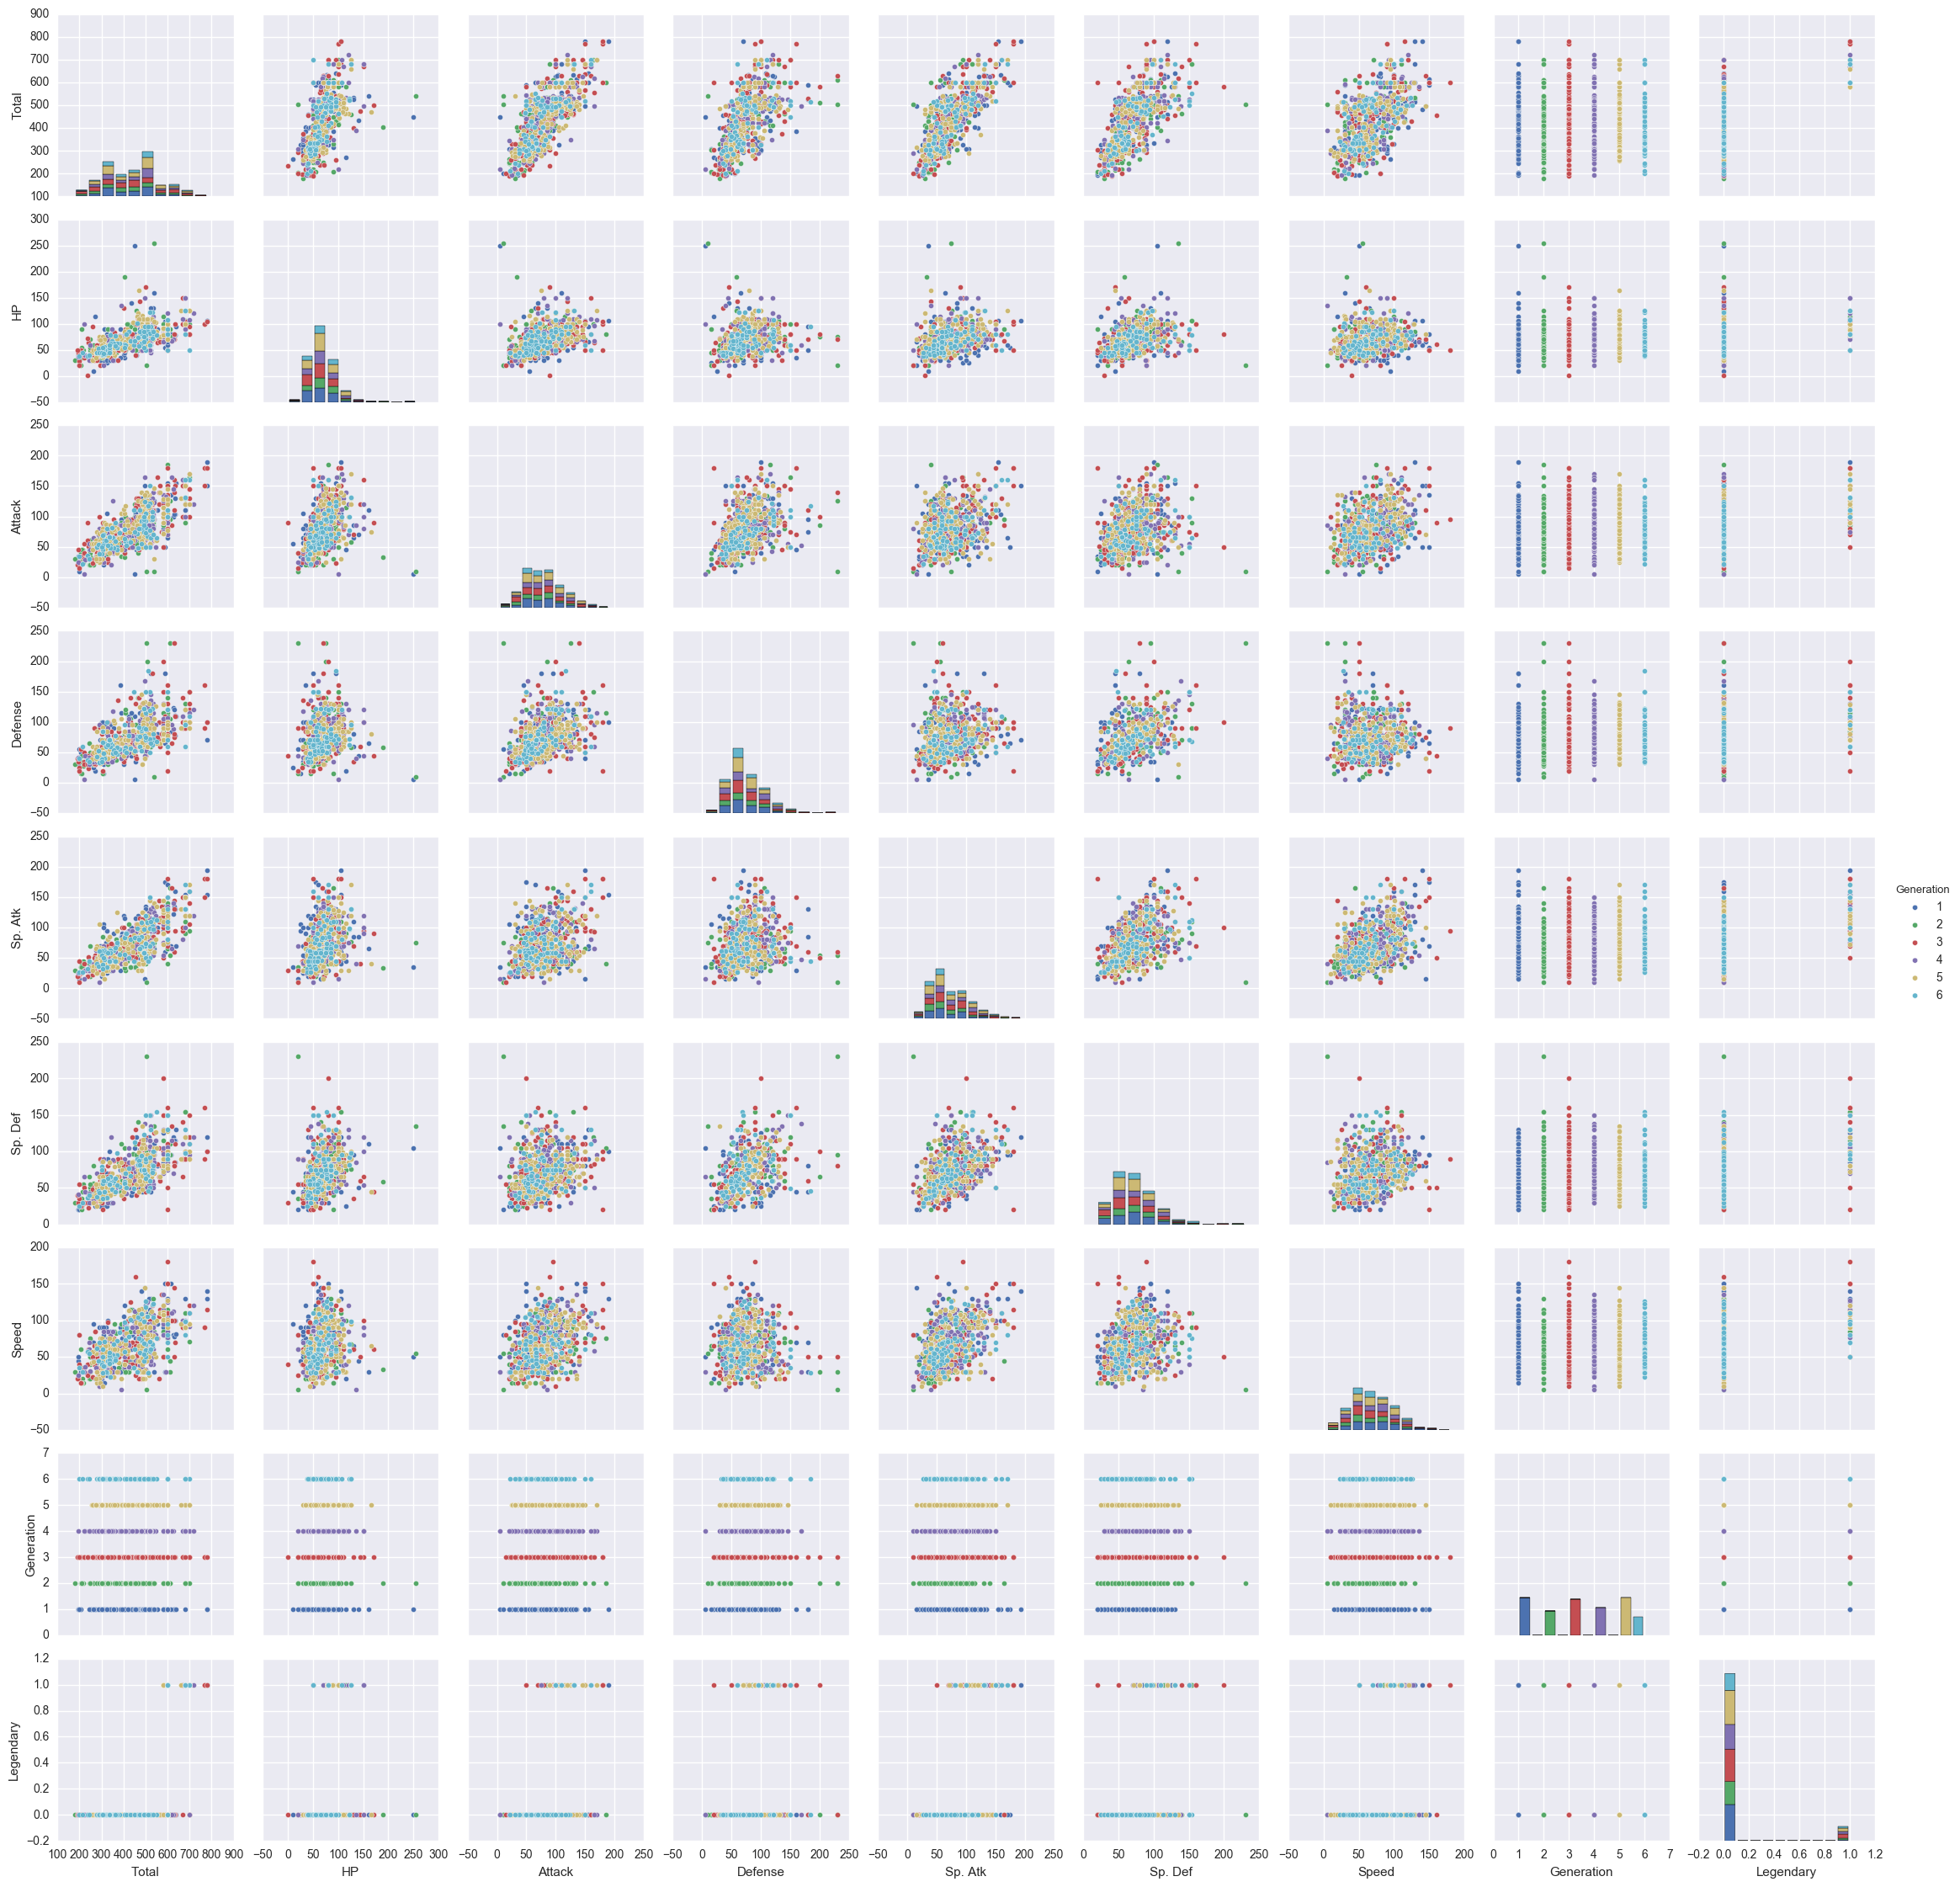

In [13]:
sns.pairplot(pokemon, hue='Generation')

In [14]:
numerial_features = pokemon.loc[:, ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
np.corrcoef(numerial_features.T)

array([[ 1.        ,  0.61874835,  0.73621065,  0.61278743,  0.74724986,
         0.71760947,  0.57594266,  0.04838402],
       [ 0.61874835,  1.        ,  0.42238603,  0.23962232,  0.36237986,
         0.37871807,  0.17595206,  0.05868251],
       [ 0.73621065,  0.42238603,  1.        ,  0.43868706,  0.39636176,
         0.26398955,  0.38123974,  0.05145134],
       [ 0.61278743,  0.23962232,  0.43868706,  1.        ,  0.22354861,
         0.51074659,  0.0152266 ,  0.04241857],
       [ 0.74724986,  0.36237986,  0.39636176,  0.22354861,  1.        ,
         0.50612142,  0.47301788,  0.03643683],
       [ 0.71760947,  0.37871807,  0.26398955,  0.51074659,  0.50612142,
         1.        ,  0.25913311,  0.02848599],
       [ 0.57594266,  0.17595206,  0.38123974,  0.0152266 ,  0.47301788,
         0.25913311,  1.        , -0.02312106],
       [ 0.04838402,  0.05868251,  0.05145134,  0.04241857,  0.03643683,
         0.02848599, -0.02312106,  1.        ]])

In [16]:
numerial_features.columns

Int64Index([  1,   2,   3,   3,   4,   5,   6,   6,   6,   7,
            ...
            714, 715, 716, 717, 718, 719, 719, 720, 720, 721],
           dtype='int64', name='#', length=800)

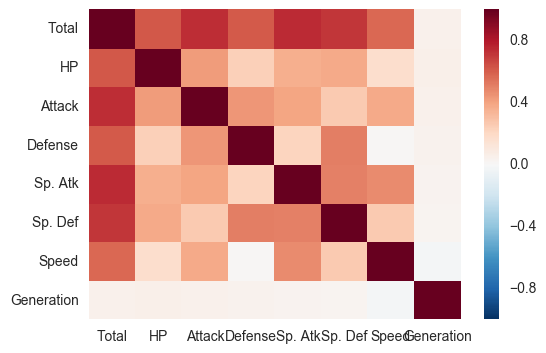

In [17]:
sns.heatmap(np.corrcoef(numerial_features.T), mask=False, \
            xticklabels=numerial_features.columns.values, \
            yticklabels=numerial_features.columns.values)

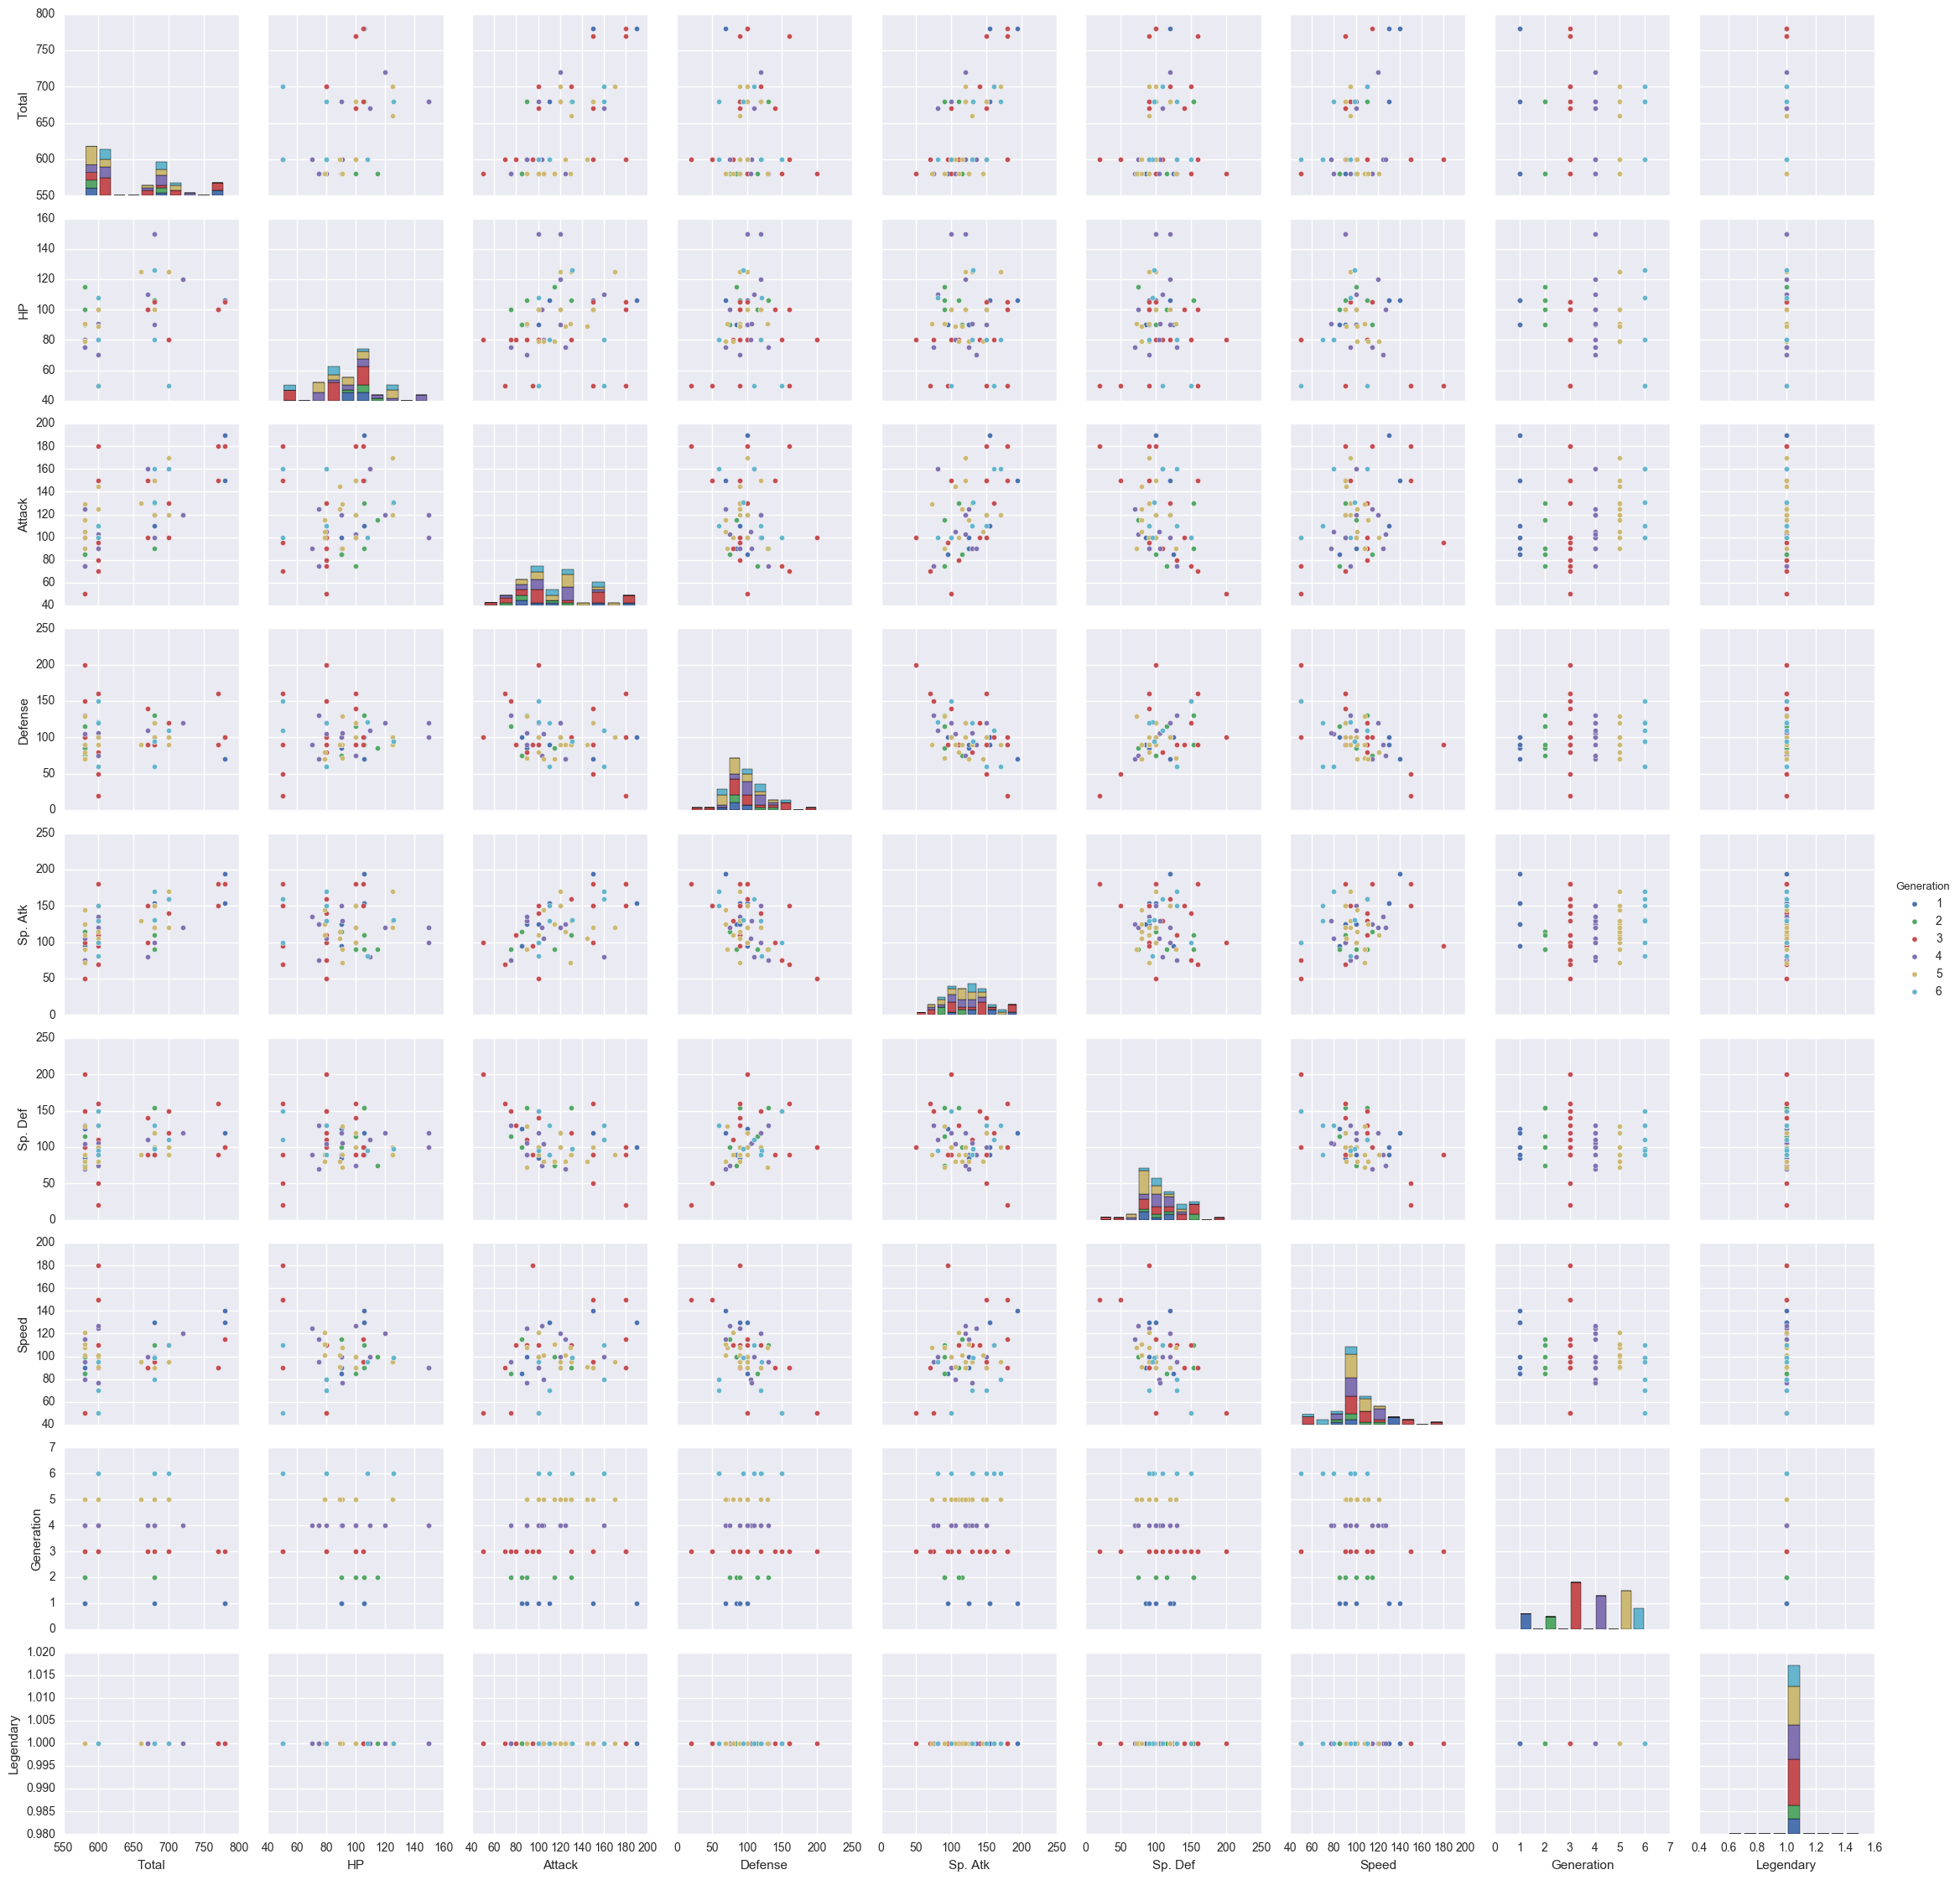

In [12]:
legendary_pokeman = pokemon[pokemon['Legendary'] == True]
sns.pairplot(legendary_pokeman, hue='Generation')

In [13]:
legendary_pokeman.groupby('Generation').count().loc[:, ['Name']]

Name
Generation      
1              6
2              5
3             18
4             13
5             15
6              8

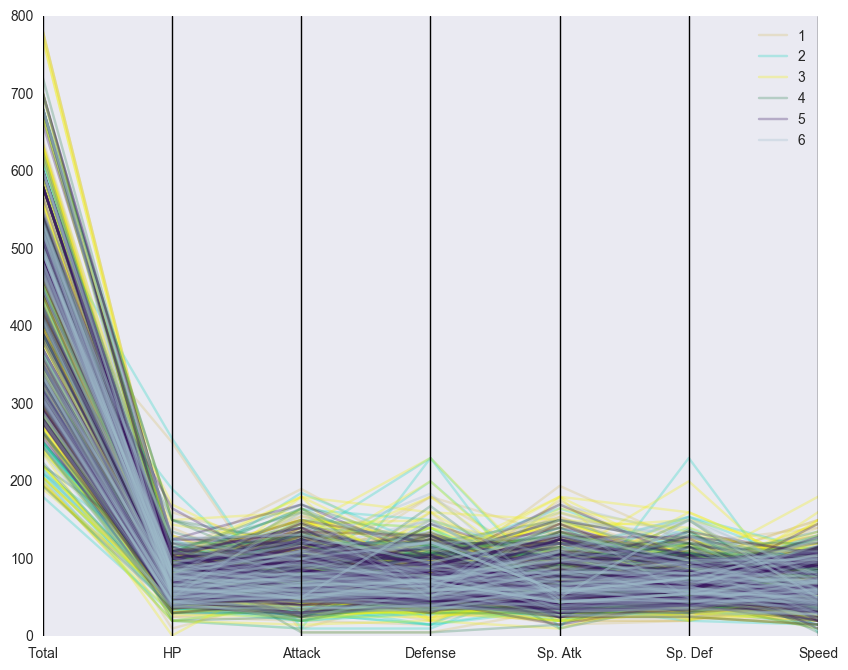

In [14]:
fig = plt.figure(figsize=(10, 8))
parallel_coordinates(numerial_features, 'Generation', alpha=0.3)
plt.show()

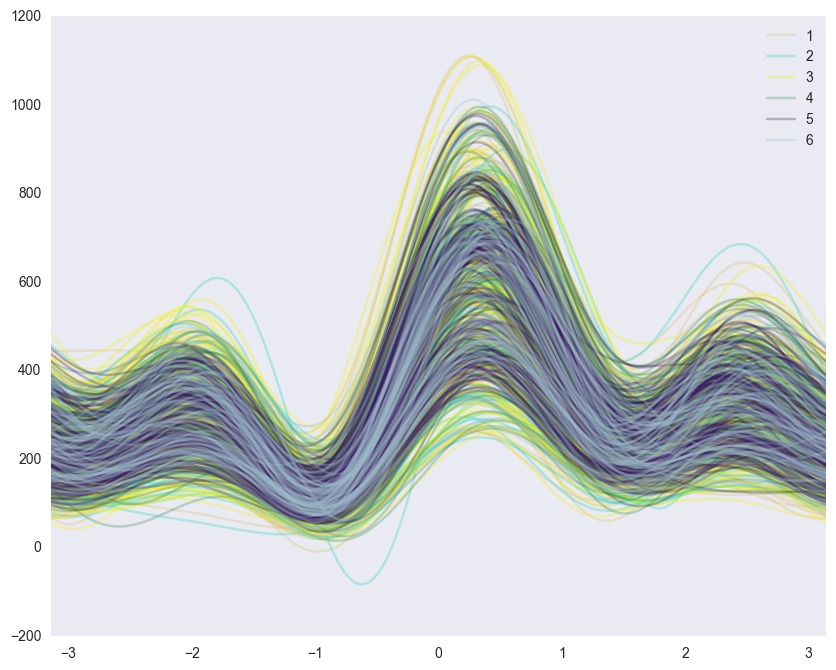

In [15]:
fig = plt.figure(figsize=(10, 8))
andrews_curves(numerial_features, 'Generation', alpha=0.3)
plt.show()

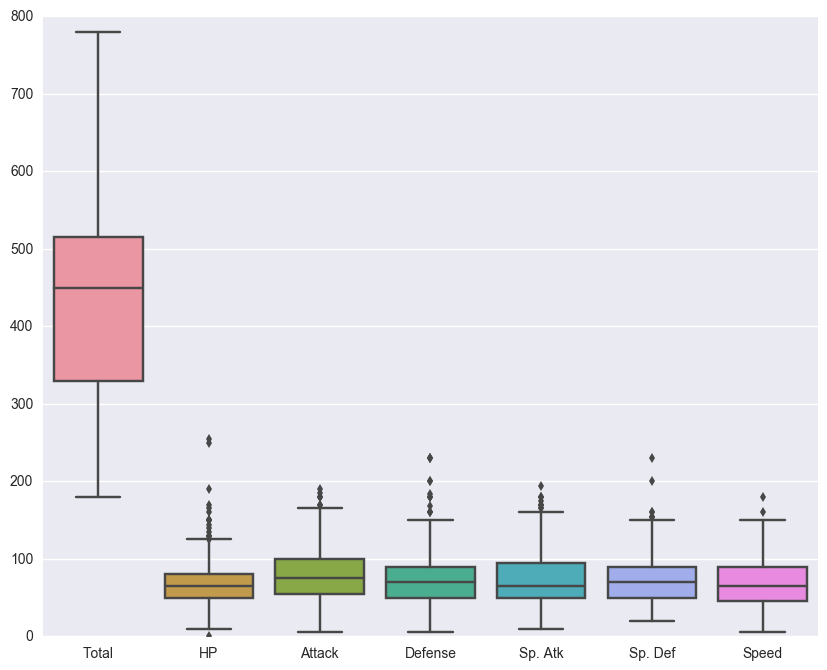

In [16]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=numerial_features.drop('Generation', axis=1))

In [17]:
pkmn = pd.melt(pokemon, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")
pkmn.head()

Name Type 1  Type 2   Stat value
0              Bulbasaur  Grass  Poison  Total   318
1                Ivysaur  Grass  Poison  Total   405
2               Venusaur  Grass  Poison  Total   525
3  VenusaurMega Venusaur  Grass  Poison  Total   625
4             Charmander   Fire     NaN  Total   309

ValueError: object too deep for desired array

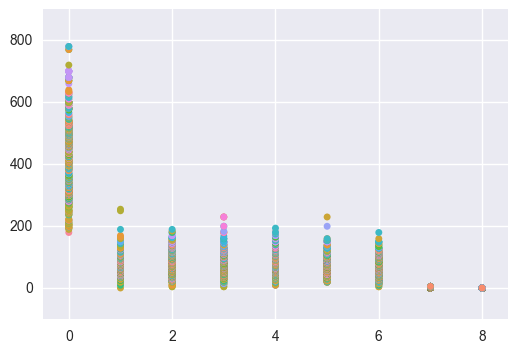

In [18]:
sns.swarmplot(x="HP", y="value", data=pkmn, hue="Type 1")

In [20]:
from IPython.display import Image
Image(url='http://img08.deviantart.net/fb0c/i/2013/082/7/5/004_charmander_by_pklucario-d5z1g9v.png')

In [28]:
g = nx.Graph()

In [31]:
g = nx.from_pandas_dataframe(pokemon, source='Name', target='Type 1')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 818
Number of edges: 800
Average degree:   1.9560


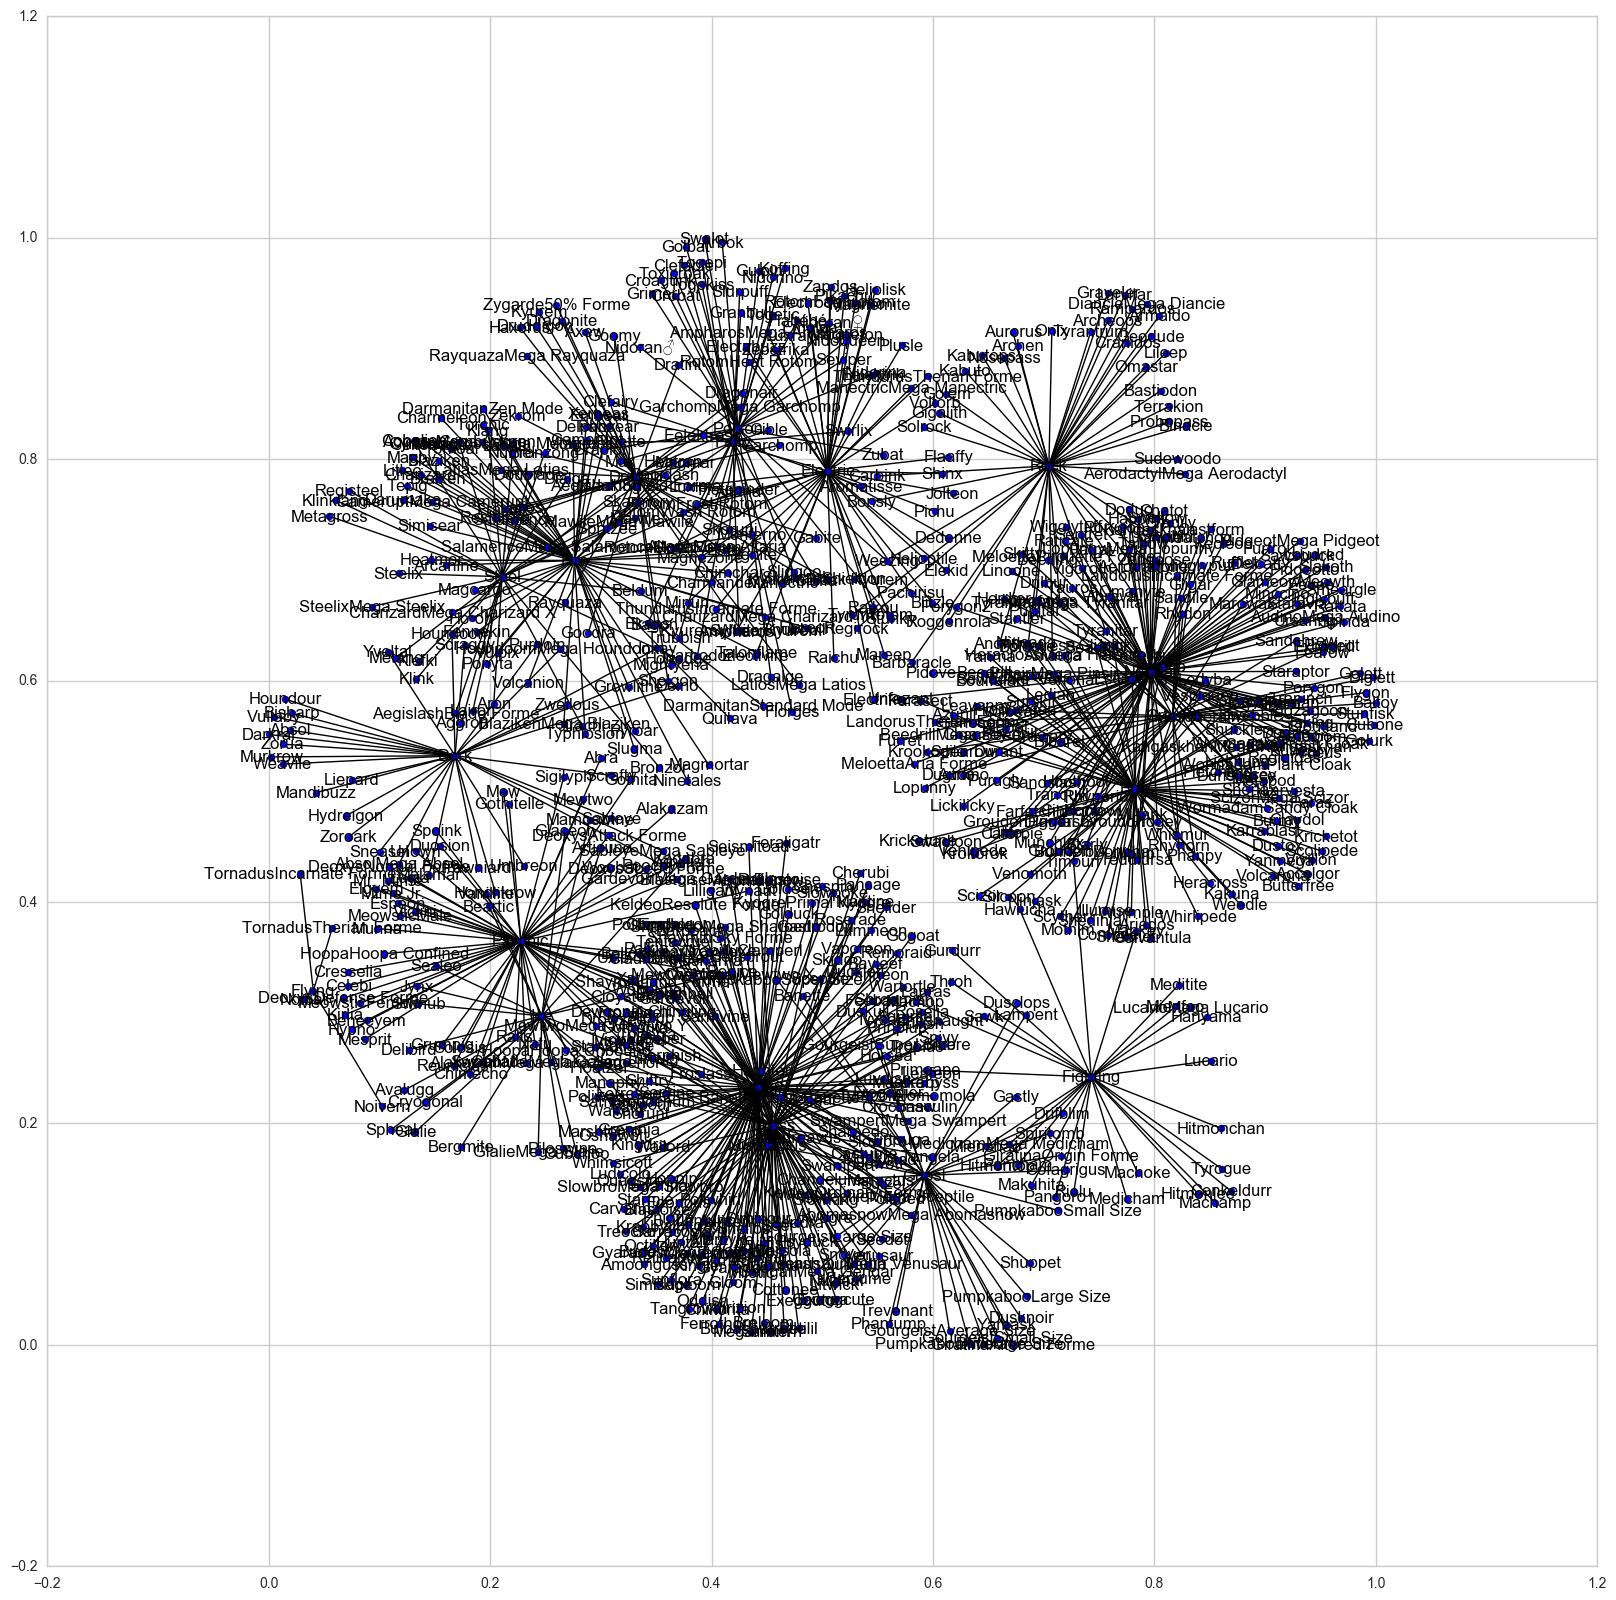

In [32]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='blue')
plt.show()